# Movie reviews

This notebook takes you though a complete iteration of Machine Learning Assignment 1 - Movie reviews. The assignment details (including links to download the data) can be found [here](https://docs.google.com/document/d/1WGYw99e5q6j5V0Zrf2HveagU6URt_kVvdR8B9HYQ99E/edit?usp=sharing). 

In [1]:
# all imports and magic commands
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_measures import BinaryClassificationPerformance
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

# Function for feature building and extraction on natural language data

In [2]:
# function that takes raw data and completes all preprocessing required before model fits
def process_raw_data(fn, my_random_seed, test=False):
    # read and summarize data
    movie_data = pd.read_csv(fn, sep='\t')
    print("movie_data is:", type(movie_data))
    print("movie_data has", movie_data.shape[0], "rows and", movie_data.shape[1], "columns", "\n")
    print("the data types for each of the columns in movie_data:")
    print(movie_data.dtypes, "\n")
    print("the first 10 rows in movie_data:")
    print(movie_data.head(5))
    if (not test):
        print("The rate of 'good' movie reviews in the dataset: ")
        print(movie_data['sentiment'].mean())

    # vectorize Bag of Words from review text; as sparse matrix
   # if (not test): # fit_transform()
        #hv = HashingVectorizer(n_features=2 ** 17, alternate_sign=False)
        #X_hv = hv.fit_transform(movie_data.review)
        #fitted_transformations.append(hv)
        #print("Shape of HashingVectorizer X:")
        #print(X_hv.shape)
    #else: # transform() 
     #   X_hv = fitted_transformations[0].transform(movie_data.review)
      #  print("Shape of HashingVectorizer X:")
       # print(X_hv.shape)
    

        # vectorize Bag of Words from review text; as sparse matrix
    if (not test): # fit_transform()
        #n_features = 2 ** 3 = 000,001,010,011,100,101,110,111
        #hash = algorithm that converts anything to numbers - encryption, no personalized dictionary
        #2**3 = faster to run = more collision  / 2**20 = longer to run = lesser collision
        #2**17 = good base
        
        #countVectorizer = final output is a number, not using a bag of words, it has a dictionary and it is fine because we have a set number of reviews
        #not good = bag of words, hashing vectorizer would not be able to detect it
        #ngram_range = 1,2 = Tricia, is , Tricia is
        #maximum number is high = takes longer to run
        #strip_accents = remove accents
        #ascii : dictionary of characters
        #tokenizer: looking is look, looks is look
        #remove stop_words {english}
        #max_features: limit the features
        cv = CountVectorizer(ngram_range=(1,3), stop_words='english', strip_accents='ascii')
        #cv = CountVectorizer(ngram_range=(1,2), stop_words='english', strip_accents='ascii', binary=True)
        X_cv = cv.fit_transform(movie_data.review)
        fitted_transformations.append(cv)
        print("Shape of CountVectorizer X:")
        print(X_cv.shape)
    else: # transform() 
        X_cv = fitted_transformations[0].transform(movie_data.review)
        print("Shape of CountVectorizer X:")
        print(X_cv.shape)
        
        #strip_accents : {'ascii'}

        
        
   # http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
    if (not test):
        transformer = TfidfTransformer()
        X_tfidf = transformer.fit_transform(X_cv)
        fitted_transformations.append(transformer)
    else:
        X_tfidf = fitted_transformations[1].transform(X_cv)
    
     #create additional quantitative features
     #features from Amazon.csv to add to feature set
    movie_data['word_count'] = movie_data['review'].str.split(' ').str.len()
    movie_data['punc_count'] = movie_data['review'].str.count("\.")

    X_quant_features = movie_data[["word_count", "punc_count"]]
    print("Look at a few rows of the new quantitative features: ")
    print(X_quant_features.head(10))
    
    # Combine all quantitative features into a single sparse matrix
    X_quant_features_csr = csr_matrix(X_quant_features)
    X_combined = hstack([X_tfidf, X_quant_features_csr])
    X_matrix = csr_matrix(X_combined) # convert to sparse matrix
    print("Size of combined bag of words and new quantitative variables matrix:")
    print(X_matrix.shape)
    
    # Create `X`, scaled matrix of features
     #feature scaling
    if (not test):
        sc = StandardScaler(with_mean=False)
        X = sc.fit_transform(X_matrix)
        fitted_transformations.append(sc)
        print(X.shape)
        y = movie_data['sentiment']
    else:
        X = fitted_transformations[2].transform(X_matrix)
        print(X.shape)
    
    # Create Training and Test Sets
    # enter an integer for the random_state parameter; any integer will work
    if (test):
        X_submission_test = X
        print("Shape of X_test for submission:")
        print(X_submission_test.shape)
        print('SUCCESS!')
        return(movie_data, X_submission_test)
    else: 
        X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = train_test_split(X, y, movie_data, test_size=0.2, random_state=my_random_seed)
        print("Shape of X_train and X_test:")
        print(X_train.shape)
        print(X_test.shape)
        print("Shape of y_train and y_test:")
        print(y_train.shape)
        print(y_test.shape)
        print("Shape of X_raw_train and X_raw_test:")
        print(X_raw_train.shape)
        print(X_raw_test.shape)
        print('SUCCESS!')
        return(X_train, X_test, y_train, y_test, X_raw_train, X_raw_test)

# Create training and test sets from function

In [3]:
# create an empty list to store any use of fit_transform() to transform() later
# it is a global list to store model and feature extraction fits
fitted_transformations = []

# OK CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = process_raw_data(fn='/users/kinetic.tricia/moviereviews_train.tsv', my_random_seed=49)

print("Number of fits stored in `fitted_transformations` list: ")
print(len(fitted_transformations))

movie_data is: <class 'pandas.core.frame.DataFrame'>
movie_data has 25000 rows and 3 columns 

the data types for each of the columns in movie_data:
id           object
sentiment     int64
review       object
dtype: object 

the first 10 rows in movie_data:
       id  sentiment                                             review
0  5814_8          1  With all this stuff going down at the moment w...
1  2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2  7759_3          0  The film starts with a manager (Nicholas Bell)...
3  3630_4          0  It must be assumed that those who praised this...
4  9495_8          1  Superbly trashy and wondrously unpretentious 8...
The rate of 'good' movie reviews in the dataset: 
0.5
Shape of CountVectorizer X:
(25000, 4302235)
Look at a few rows of the new quantitative features: 
   word_count  punc_count
0         433          20
1         158          16
2         378          20
3         379           8
4         367           9
5

# Fit (and tune) Various Models

### MODEL: ordinary least squares

In [ ]:
from sklearn import linear_model
ols = linear_model.SGDClassifier(loss="squared_loss", alpha=10)
#ols = linear_model.SGDClassifier(loss="squared_loss", alpha=1.0)
#ols = linear_model.SGDClassifier(loss="squared_loss", alpha=10)
#ols = linear_model.SGDClassifier(loss="squared_loss", alpha=1.0)
#ols = linear_model.SGDClassifier(loss="squared_loss", alpha=0.1)
#ols = linear_model.SGDClassifier(loss="squared_loss", alpha=0.028)
#alpha parameter: smoothing out the differences between the values
#trade off loss of information and loss of accuracy
#the higher the number, more regularization
ols.fit(X_train, y_train)

ols_performance_train = BinaryClassificationPerformance(ols.predict(X_train), y_train, 'ols_train')
ols_performance_train.compute_measures()
print(ols_performance_train.performance_measures)

### MODEL: SVM, linear

In [ ]:
from sklearn import linear_model
svm = linear_model.SGDClassifier(alpha=0.01)
#svm = linear_model.SGDClassifier(alpha=10)
#svm = linear_model.SGDClassifier(alpha=1.0)
#svm = linear_model.SGDClassifier(alpha=0.1)
#svm = linear_model.SGDClassifier(alpha=0.028)
svm.fit(X_train, y_train)

svm_performance_train = BinaryClassificationPerformance(svm.predict(X_train), y_train, 'svm_train')
svm_performance_train.compute_measures()
print(svm_performance_train.performance_measures)

### MODEL: logistic regression

In [ ]:
from sklearn import linear_model
lgs = linear_model.SGDClassifier(loss='log', alpha=0.01)
#lgs = linear_model.SGDClassifier(loss='log', alpha=10)
#lgs = linear_model.SGDClassifier(loss='log', alpha=1.0)
#lgs = linear_model.SGDClassifier(loss='log', alpha=0.1)
#lgs = linear_model.SGDClassifier(loss='log', alpha=0.028)
lgs.fit(X_train, y_train)

lgs_performance_train = BinaryClassificationPerformance(lgs.predict(X_train), y_train, 'lgs_train')
lgs_performance_train.compute_measures()
print(lgs_performance_train.performance_measures)

### MODEL: Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nbs = MultinomialNB()
nbs.fit(X_train, y_train)

nbs_performance_train = BinaryClassificationPerformance(nbs.predict(X_train), y_train, 'nbs_train')
nbs_performance_train.compute_measures()
print(nbs_performance_train.performance_measures)

### MODEL: Perceptron

In [69]:
from sklearn import linear_model
prc = linear_model.SGDClassifier(loss='perceptron', alpha=0.01, max_iter=100)
#prc = linear_model.SGDClassifier(loss='perceptron', alpha=10)
#prc = linear_model.SGDClassifier(loss='perceptron', alpha=1.0)
#prc = linear_model.SGDClassifier(loss='perceptron', alpha=0.1)
#prc = linear_model.SGDClassifier(loss='perceptron', alpha=0.028)
prc.fit(X_train, y_train)

prc_performance_train = BinaryClassificationPerformance(prc.predict(X_train), y_train, 'prc_train')
prc_performance_train.compute_measures()
print(prc_performance_train.performance_measures)

{'Pos': 10009, 'Neg': 9991, 'TP': 10009, 'TN': 9991, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'prc_train'}


In [46]:
from sklearn import linear_model
prc1 = linear_model.SGDClassifier(loss='perceptron', alpha=0.01, max_iter=1000)
prc1.fit(X_train, y_train)

prc1_performance_train = BinaryClassificationPerformance(prc1.predict(X_train), y_train, 'prc1_train')
prc1_performance_train.compute_measures()
print(prc1_performance_train.performance_measures)

{'Pos': 10009, 'Neg': 9991, 'TP': 10009, 'TN': 9991, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'prc1_train'}


In [6]:
from sklearn import linear_model
prc2 = linear_model.SGDClassifier(loss='perceptron', alpha=0.0001)
prc2.fit(X_train, y_train)

prc2_performance_train = BinaryClassificationPerformance(prc2.predict(X_train), y_train, 'prc2_train')
prc2_performance_train.compute_measures()
print(prc2_performance_train.performance_measures)

{'Pos': 10009, 'Neg': 9991, 'TP': 10009, 'TN': 9991, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'prc2_train'}


In [7]:
from sklearn import linear_model
prc3 = linear_model.SGDClassifier(loss='perceptron', alpha=0.00001)
prc3.fit(X_train, y_train)

prc3_performance_train = BinaryClassificationPerformance(prc3.predict(X_train), y_train, 'prc3_train')
prc3_performance_train.compute_measures()
print(prc3_performance_train.performance_measures)

{'Pos': 10009, 'Neg': 9991, 'TP': 10009, 'TN': 9991, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'prc3_train'}


### MODEL: Ridge Regression Classifier

In [ ]:
from sklearn import linear_model
#rdg = linear_model.RidgeClassifier()
#rdg = linear_model.RidgeClassifier(alpha=100)
#rdg = linear_model.RidgeClassifier(alpha=1000)
#rdg = linear_model.RidgeClassifier(alpha=100000)
rdg = linear_model.RidgeClassifier()
rdg.fit(X_train, y_train)

rdg_performance_train = BinaryClassificationPerformance(rdg.predict(X_train), y_train, 'rdg_train5000000')
rdg_performance_train.compute_measures()
print(rdg_performance_train.performance_measures)

In [ ]:
from sklearn import linear_model
rdg1 = linear_model.RidgeClassifier(alpha=10)
rdg1.fit(X_train, y_train)

rdg1_performance_train = BinaryClassificationPerformance(rdg1.predict(X_train), y_train, 'rdg_train10')
rdg1_performance_train.compute_measures()
print(rdg1_performance_train.performance_measures)

In [ ]:
from sklearn import linear_model
rdg2 = linear_model.RidgeClassifier(alpha=100)
rdg2.fit(X_train, y_train)

rdg2_performance_train = BinaryClassificationPerformance(rdg2.predict(X_train), y_train, 'rdg_train100')
rdg2_performance_train.compute_measures()
print(rdg2_performance_train.performance_measures)

In [ ]:
from sklearn import linear_model
rdg3 = linear_model.RidgeClassifier(alpha=1000)
rdg3.fit(X_train, y_train)

rdg3_performance_train = BinaryClassificationPerformance(rdg3.predict(X_train), y_train, 'rdg_train1000')
rdg3_performance_train.compute_measures()
print(rdg3_performance_train.performance_measures)

### MODEL: Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(max_depth=2, random_state=0)
rdf.fit(X_train, y_train)

rdf_performance_train = BinaryClassificationPerformance(rdf.predict(X_train), y_train, 'rdf_train')
rdf_performance_train.compute_measures()
print(rdf_performance_train.performance_measures)

### ROC plot to compare performance of various models and fits

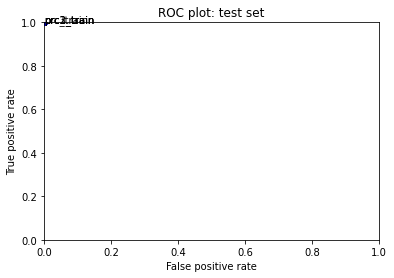

In [61]:
#fits = [ols_performance_train, svm_performance_train, lgs_performance_train, nbs_performance_train, prc_performance_train, rdg_performance_train, rdf_performance_train]
fits = [prc_performance_train, prc1_performance_train, prc2_performance_train, prc3_performance_train]
#fits = [rdg_performance_train]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

### looking at reviews based on their classification

Let's say we decide that Ordinary Least Squares (OLS) Regression is the best model for generalization. Let's take a look at some of the reviews and try to make a (subjective) determination of whether it's generalizing well. 

In [ ]:
#ols_predictions = ols.predict(X_train)
rdg_predictions = rdg.predict(X_train)

### let's look at some false positives:

In [ ]:
# false positives

print("Examples of false positives:")

import random, time

#for i in range(0, len(ols_predictions)):
 #   if (ols_predictions[i] == 1):
  #      if (X_raw_train.iloc[i]['sentiment'] == 0):
   #         if (random.uniform(0, 1) < 0.05): # to print only 5% of the false positives
    #            print(i)
     #           print(X_raw_train.iloc[i]['review'])
      #          print('* * * * * * * * * ')
    
for i in range(0, len(rdg_predictions)):
    if (rdg_predictions[i] == 1):
        if (X_raw_train.iloc[i]['sentiment'] == 0):
            if (random.uniform(0, 1) < 0.05): # to print only 5% of the false positives
                print(i)
                print(X_raw_train.iloc[i]['review'])
                print('* * * * * * * * * ')


---

# <span style="color:red">WARNING: Don't look at test set performance too much!</span>

---

The following cells show performance on your test set. Do not look at this too often! 

# Look at performance on the test set

### MODEL: ordinary least squares

In [ ]:
ols_performance_test = BinaryClassificationPerformance(ols.predict(X_test), y_test, 'ols_test')
ols_performance_test.compute_measures()
print(ols_performance_test.performance_measures)

### MODEL: SVM, linear

In [ ]:
svm_performance_test = BinaryClassificationPerformance(svm.predict(X_test), y_test, 'svm_test')
svm_performance_test.compute_measures()
print(svm_performance_test.performance_measures)

### MODEL: logistic regression

In [ ]:
lgs_performance_test = BinaryClassificationPerformance(lgs.predict(X_test), y_test, 'lgs_test')
lgs_performance_test.compute_measures()
print(lgs_performance_test.performance_measures)

### MODEL: Naive Bayes

In [ ]:
nbs_performance_test = BinaryClassificationPerformance(nbs.predict(X_test), y_test, 'nbs_test')
nbs_performance_test.compute_measures()
print(nbs_performance_test.performance_measures)

### MODEL: Perceptron

In [72]:
prc_performance_test = BinaryClassificationPerformance(prc.predict(X_test), y_test, 'Aprc_test')
prc_performance_test.compute_measures()
print(prc_performance_test.performance_measures)

{'Pos': 2491, 'Neg': 2509, 'TP': 2042, 'TN': 2049, 'FP': 460, 'FN': 449, 'Accuracy': 0.8182, 'Precision': 0.8161470823341327, 'Recall': 0.8197511039743075, 'desc': 'Aprc_test'}


In [71]:
prc1_performance_test = BinaryClassificationPerformance(prc1.predict(X_test), y_test, 'Sprc1_test')
prc1_performance_test.compute_measures()
print(prc1_performance_test.performance_measures)

prc2_performance_test = BinaryClassificationPerformance(prc2.predict(X_test), y_test, 'prc2_test')
prc2_performance_test.compute_measures()
print(prc2_performance_test.performance_measures)

prc3_performance_test = BinaryClassificationPerformance(prc3.predict(X_test), y_test, 'prc3_test')
prc3_performance_test.compute_measures()
print(prc3_performance_test.performance_measures)

{'Pos': 2491, 'Neg': 2509, 'TP': 2048, 'TN': 2067, 'FP': 442, 'FN': 443, 'Accuracy': 0.823, 'Precision': 0.8224899598393575, 'Recall': 0.8221597751906865, 'desc': 'Sprc1_test'}
{'Pos': 2491, 'Neg': 2509, 'TP': 2040, 'TN': 2045, 'FP': 464, 'FN': 451, 'Accuracy': 0.817, 'Precision': 0.8146964856230032, 'Recall': 0.8189482135688478, 'desc': 'prc2_test'}
{'Pos': 2491, 'Neg': 2509, 'TP': 2022, 'TN': 2061, 'FP': 448, 'FN': 469, 'Accuracy': 0.8166, 'Precision': 0.8186234817813766, 'Recall': 0.811722199919711, 'desc': 'prc3_test'}


### MODEL: Ridge Regression Classifier

In [ ]:
rdg_performance_test = BinaryClassificationPerformance(rdg.predict(X_test), y_test, 'rdg_test5000000')
rdg_performance_test.compute_measures()
print(rdg_performance_test.performance_measures)

In [ ]:
rdg1_performance_test = BinaryClassificationPerformance(rdg1.predict(X_test), y_test, 'rdg_test10')
rdg1_performance_test.compute_measures()
print(rdg1_performance_test.performance_measures)

In [ ]:
rdg2_performance_test = BinaryClassificationPerformance(rdg2.predict(X_test), y_test, 'rdg_test100')
rdg2_performance_test.compute_measures()
print(rdg2_performance_test.performance_measures)

In [ ]:
rdg3_performance_test = BinaryClassificationPerformance(rdg3.predict(X_test), y_test, 'rdg_test1000')
rdg3_performance_test.compute_measures()
print(rdg3_performance_test.performance_measures)

### MODEL: Random Forest Classifier

In [ ]:
rdf_performance_test = BinaryClassificationPerformance(rdf.predict(X_test), y_test, 'rdf_test')
rdf_performance_test.compute_measures()
print(rdf_performance_test.performance_measures)

### ROC plot to compare performance of various models and fits

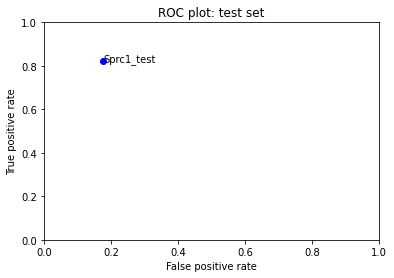

In [74]:
#fits = [ols_performance_test, svm_performance_test, lgs_performance_test, nbs_performance_test, prc_performance_test, rdg_performance_test, rdf_performance_test]
fits = [prc1_performance_test]
#fits = [rdg_performance_test]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
    
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

---

# <span style="color:red">SUBMISSION</span>

---

In [75]:
# read in test data for submission
# OK CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
raw_data, X_test_submission = process_raw_data(fn='/users/kinetic.tricia/moviereviews_test.tsv', my_random_seed=49, test=True)
print("Number of rows in the submission test set (should be 25,000): ")

movie_data is: <class 'pandas.core.frame.DataFrame'>
movie_data has 25000 rows and 2 columns 

the data types for each of the columns in movie_data:
id        object
review    object
dtype: object 

the first 10 rows in movie_data:
         id                                             review
0  12311_10  Naturally in a film who's main themes are of m...
1    8348_2  This movie is a disaster within a disaster fil...
2    5828_4  All in all, this is a movie for kids. We saw i...
3    7186_2  Afraid of the Dark left me with the impression...
4   12128_7  A very accurate depiction of small time mob li...
Shape of CountVectorizer X:
(25000, 4302235)
Look at a few rows of the new quantitative features: 
   word_count  punc_count
0         131           5
1         169          15
2         176          18
3         112           5
4         133           8
5         331          20
6         121          18
7         230          22
8          59           3
9         224          14
Size 

---

Choose a <span style="color:red">*single*</span> model for your submission. In this code, I am choosing the Ordinary Least Squares model fit, which is in the `ols` object. But you should choose the model that is performing the best for you! 

In [76]:
# store the id from the raw data
my_submission = pd.DataFrame(raw_data["id"])
# concatenate predictions to the id
#my_submission["prediction"] = ols.predict(X_test_submission)
my_submission["prediction"] = prc1.predict(X_test_submission)
# look at the proportion of positive predictions
print(my_submission['prediction'].mean())

0.4746


In [77]:
raw_data.head()

,id,review,word_count,punc_count
0,12311_10,Naturally in a film who's main themes are of m...,131,5
1,8348_2,This movie is a disaster within a disaster fil...,169,15
2,5828_4,"All in all, this is a movie for kids. We saw i...",176,18
3,7186_2,Afraid of the Dark left me with the impression...,112,5
4,12128_7,A very accurate depiction of small time mob li...,133,8


In [78]:
my_submission.head()

,id,prediction
0,12311_10,1
1,8348_2,0
2,5828_4,1
3,7186_2,1
4,12128_7,1


In [79]:
my_submission.shape

(25000, 2)

In [80]:
# export submission file as pdf
# CHANGE FILE PATH: 
my_submission.to_csv('/users/kinetic.tricia/moviereviews_submission2.csv', index=False)

# Submit to Canvas: 1) the CSV file that was written in the previous cell and 2) the url to the repository (GitHub or other) that contains your code and documentation